In [2]:
import sys

assert sys.version_info >= (3, 7)
import cv2 as cv
import numpy as np
from util_func import *

In [45]:
def canny_auto(img,method, sigma=0.33):
    """Args:
    img: grayscale
    method: median, triangle, and otsu
    sigma = 0.33(default)"""
    if method =="median":
        Th = np.median(img)
    elif method =="triangle":
        Th = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)[0]
    elif method =="otsu":
        Th = cv.threshold(img,0,255,cv.THRESH_OTSU)[0]
    else:
        raise Exception("method specified no available")
    lowThresh = (1-sigma) * Th
    highThresh = (1+sigma) * Th
    return cv.Canny(img, lowThresh,highThresh)

[]

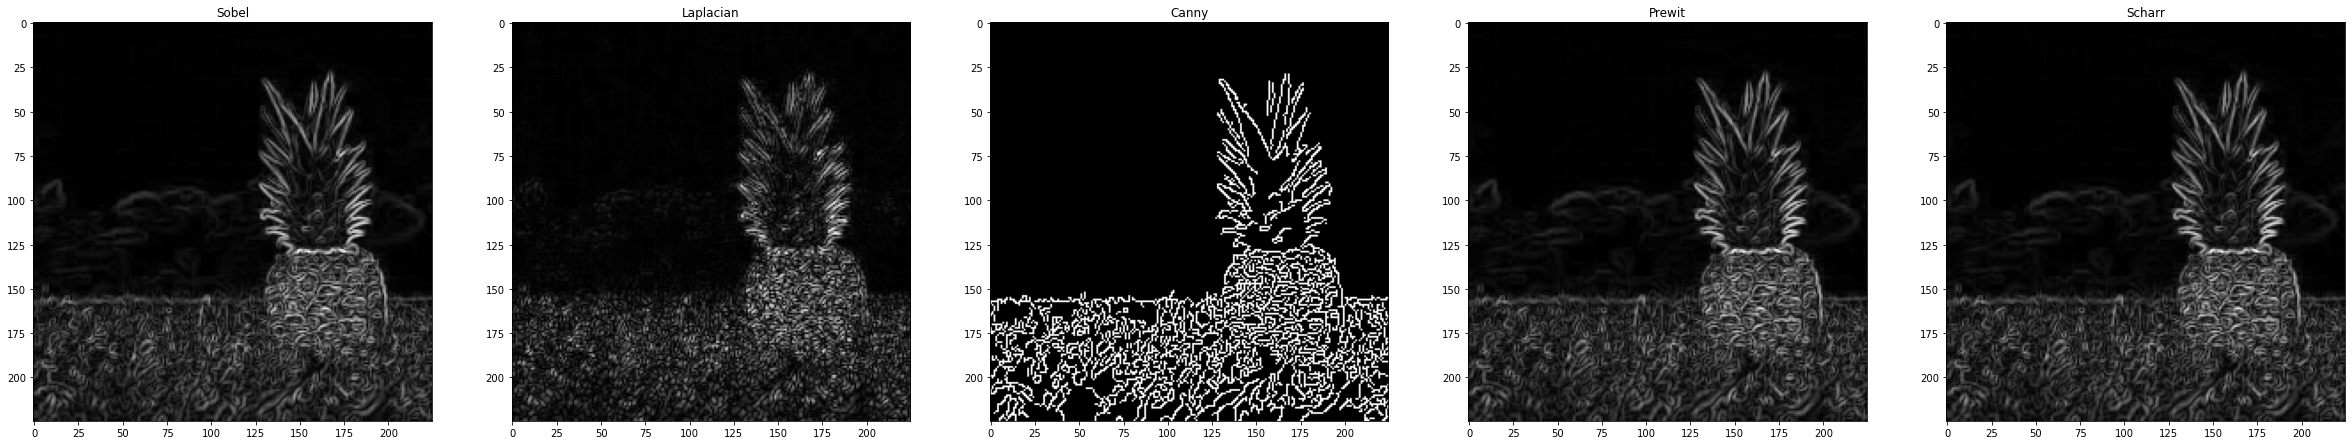

In [66]:
img = cv.imread("images/pineapple.jfif", 0)
sobelx = cv.Sobel(img, cv.CV_32F, 1, 0,ksize=3)
sobelx_8u = cv.convertScaleAbs(sobelx)
sobely = cv.Sobel(img, cv.CV_32F, 0, 1,ksize=3)
sobely_8u = cv.convertScaleAbs(sobely)
plt.figure(figsize=(50, 50))
gradient = cv.magnitude(sobelx, sobely)
direction = np.arctan2(sobelx, sobely) * (180/ np.pi) % 180

plt.subplot(161) 
plt.imshow(gradient,cmap="gray")
plt.title("Sobel")

blur = cv.GaussianBlur(img,(3,3),0)
LoG = cv.Laplacian(blur, cv.CV_16S)
LoG = cv.convertScaleAbs(LoG)

plt.subplot(162)
plt.title("Laplacian")
plt.imshow(LoG,cmap="gray")

edge = cv.Canny(img, 100, 300,apertureSize=3)

plt.subplot(163)
plt.title("Canny")
plt.imshow(edge,cmap="gray")

prewitt_gradient = np.sqrt(sobelx**2 + sobely**2)
prewitt_normalized = cv.normalize(prewitt_gradient, None, 0, 255, cv.NORM_MINMAX)

plt.subplot(164)
plt.title("Prewit")
plt.imshow(prewitt_normalized,cmap="gray")
plt.plot()

scharr_x = cv.Scharr(image, cv.CV_64F, 1, 0)
sharr_y = cv.Scharr(image, cv.CV_64F, 0, 1)
scharr_gradient = np.sqrt(dx**2 + dy**2)
scharr_normalized = cv.normalize(scharr_gradient, None, 0, 255, cv.NORM_MINMAX)


plt.subplot(165)
plt.title("Scharr")
plt.imshow(scharr_normalized,cmap="gray")
plt.plot()


#Canny edge ->Scharr -> Prewit -> Sobel -> Laplacian
#Canny edge stands out more and Laplacian edge is not as obvious as canny

In [67]:

image = cv.imread("images/electronic.jfif")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 190, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv.contourArea)
x, y, w, h = cv.boundingRect(largest_contour)
cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle
cv.imshow('White Object Detection', image)
cv.waitKey(0)
cv.destroyAllWindows()

In [64]:
img = cv.imread("images/clock.jpg")
factor = 300 / img.shape[1]
img = cv.resize(img, None, fx=factor,fy = factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.bilateralFilter(gray, 7, 19, 13)
edge = canny_auto(blur,method="otsu")
contours,_= cv.findContours(edge,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours,key=cv.contourArea,reverse=True)[:5]
screen = None
img_copy=img.copy()
for c in cnts:
    peri = cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,0.1*peri, True)
    
    if len(approx) >= 4:
            screen=c
            break
                
        
cv.drawContours(img_copy,[screen],-1,(0,255,0),2)
show_img("contour",img_copy)